## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [1]:
import pandas as pnd
import numpy as nmp                            

In [28]:
std_bhv = pd.read_csv('S_B_Copy1.csv')
std_bhv.head(n=5)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

<AxesSubplot:>

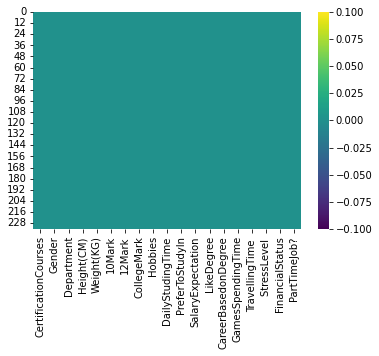

In [29]:

sns.heatmap(std_bhv.isnull(), cmap='viridis')

In [27]:
# отсутствуют пропущенные значение весь график одного цвета

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [38]:
std_bhv.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CBD,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [39]:
std_bhv = std_bhv.rename(columns={"CareerBasedonDegree": 'CBD'})

In [40]:
std_bhv['CBD'] = std_bhv['CBD'].apply(lambda x: int(x[:-1]))

In [42]:
std_bhv['CBD'].value_counts()

75     114
50      61
100     44
25      14
0        2
Name: CBD, dtype: int64

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

выведу название колонок чтоб найти те которые заканчиваются на time,
для удобства переименую их 

In [43]:
std_bhv.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CBD', 'GamesSpendingTime', 'TravellingTime ',
       'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

In [45]:
std_bhv = std_bhv.rename(columns={"GamesSpendingTime": 'game_t',\
                                  'DailyStudingTime': 'study_t',\
                                  "TravellingTime ": 'travel_t'})

In [46]:
std_bhv['study_t'].value_counts()

30 - 60 minute      81
1 - 2 Hour          61
0 - 30 minute       46
2 - 3 hour          24
3 - 4 hour          15
More Than 4 hour     8
Name: study_t, dtype: int64

будем брать нижний порог из значений

In [50]:
std_bhv["game_t"] = std_bhv["game_t"].map({"30 - 60 Minute":30,\
                                        "1 - 1.30 hour":60,\
                                        "1 - 30 Minute":1,\
                                        "More than 2 hour":120,\
                                        "1.30 - 2 hour":90,\
                                        "0 Minute":0})


проделаем ту же операцию для остальных двух колонок

In [51]:
std_bhv["study_t"] = std_bhv["study_t"].map({"30 - 60 minute":30,\
                                             "1 - 2 Hour":60,\
                                             "0 - 30 minute":0,\
                                             "2 - 3 hour":120,\
                                             "3 - 4 hour":180,\
                                             "More Than 4 hour":240})

In [52]:
std_bhv["travel_t"] = std_bhv["travel_t"].map({"30 - 60 minutes":30,\
                                               "0 - 30 minutes":0,\
                                               "1 - 1.30 hour":60,\
                                               "1.30 - 2 hour":90,\
                                               "2 - 2.30 hour":120,\
                                               "2.30 - 3 hour":150,\
                                               "more than 3 hour":180})
                                               

In [53]:
#минимумы
std_bhv["game_t"].min()

0

In [54]:
std_bhv["travel_t"].min()

0

In [55]:
std_bhv["study_t"].min()

0

**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [59]:
# посмотрим визуально на столбцы
std_bhv.tail(n=7)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,study_t,PreferToStudyIn,SalaryExpectation,LikeDegree,CBD,game_t,travel_t,StressLevel,FinancialStatus,PartTimeJob?
228,Yes,Male,B.com ISM,155.0,68.0,75.0,75.0,65.0,Sports,60,Anytime,500,Yes,100,90,60,Good,good,No
229,No,Female,B.com ISM,153.0,60.0,60.0,70.0,70.0,Sports,60,Anytime,15000,Yes,75,60,0,Good,Bad,No
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30,Morning,7000,Yes,50,120,30,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,120,Anytime,25000,Yes,75,30,30,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30,Night,20000,Yes,50,30,150,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0,Anytime,20000,Yes,75,120,150,Awful,good,No
234,No,Female,B.com ISM,155.0,39.0,45.0,45.0,50.0,Sports,180,Night,10,No,75,30,150,fabulous,good,No


In [61]:
print('оказались непрерывными данные столбцы')
print(['10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'Height(CM)', 'Weight(KG)'])

оказались непрерывными данные столбцы
['10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'Height(CM)', 'Weight(KG)']


глянем на их распределение

array([[<AxesSubplot:title={'center':'10Mark'}>,
        <AxesSubplot:title={'center':'12Mark'}>],
       [<AxesSubplot:title={'center':'CollegeMark'}>,
        <AxesSubplot:title={'center':'SalaryExpectation'}>],
       [<AxesSubplot:title={'center':'Height(CM)'}>,
        <AxesSubplot:title={'center':'Weight(KG)'}>]], dtype=object)

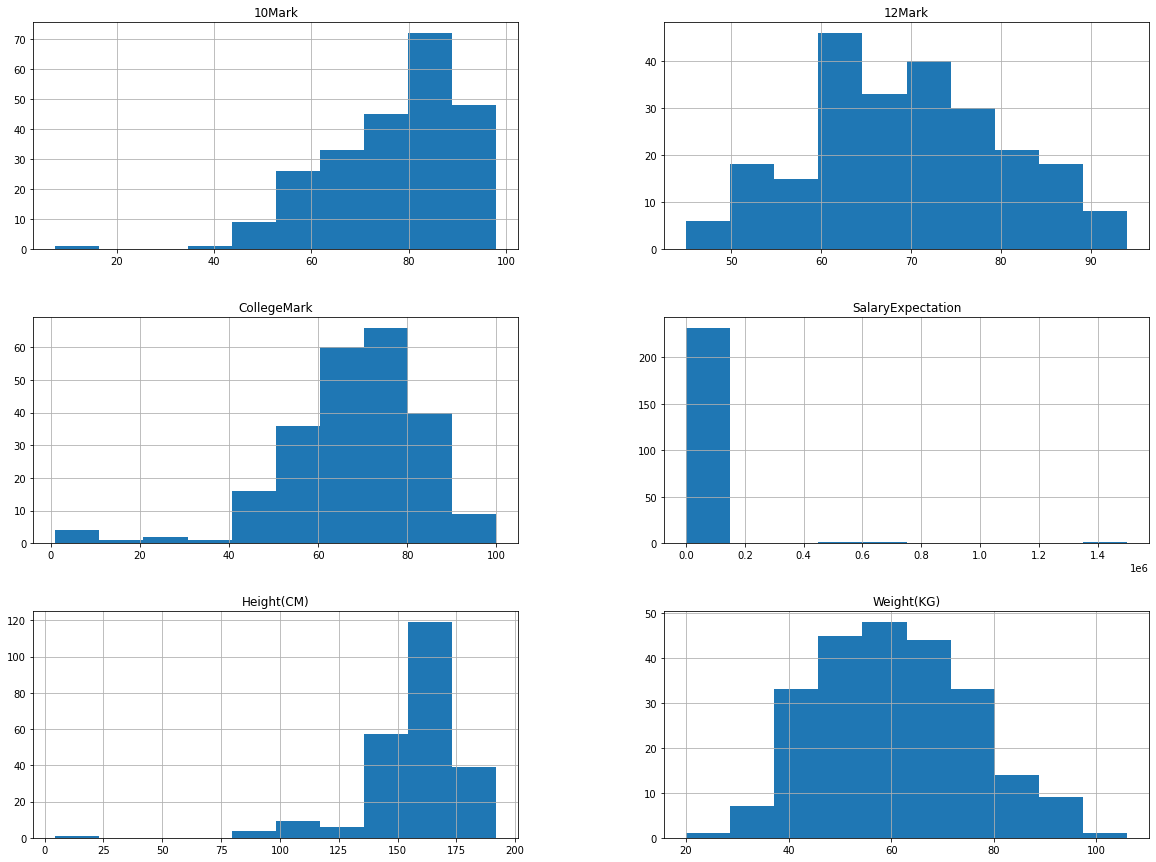

In [65]:
std_bhv[['10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'Height(CM)', 'Weight(KG)']].hist(figsize=(20,15))

исключим из предсказания столбец высота и вес

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

чтоб посмотреть выбросы можем глянуть на описание статистических показателей данных

In [68]:
std_bhv.describe()

,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,study_t,SalaryExpectation,CBD,game_t,travel_t
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02,235.000000,235.000000,235.000000
mean,157.402128,60.803830,76.842128,68.780128,70.660553,57.829787,3.248168e+04,69.574468,49.731915,49.404255
std,21.510805,14.895844,13.050800,11.016533,15.727446,58.433730,1.113146e+05,21.178671,39.137611,46.726911
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,152.000000,50.000000,70.000000,60.000000,60.000000,30.000000,1.500000e+04,50.000000,30.000000,30.000000
50%,160.000000,60.000000,80.000000,69.000000,70.000000,30.000000,2.000000e+04,75.000000,30.000000,30.000000
75%,170.000000,70.000000,86.250000,76.000000,80.000000,60.000000,2.500000e+04,75.000000,75.000000,60.000000
max,192.000000,106.000000,98.000000,94.000000,100.000000,240.000000,1.500000e+06,100.000000,120.000000,180.000000


обычно помогает смотреть насколько максимум отличается от 50 и 75-того перцентиля, 
на мой взгляд зарплатное ожидание выглядит подозрительно

<AxesSubplot:>

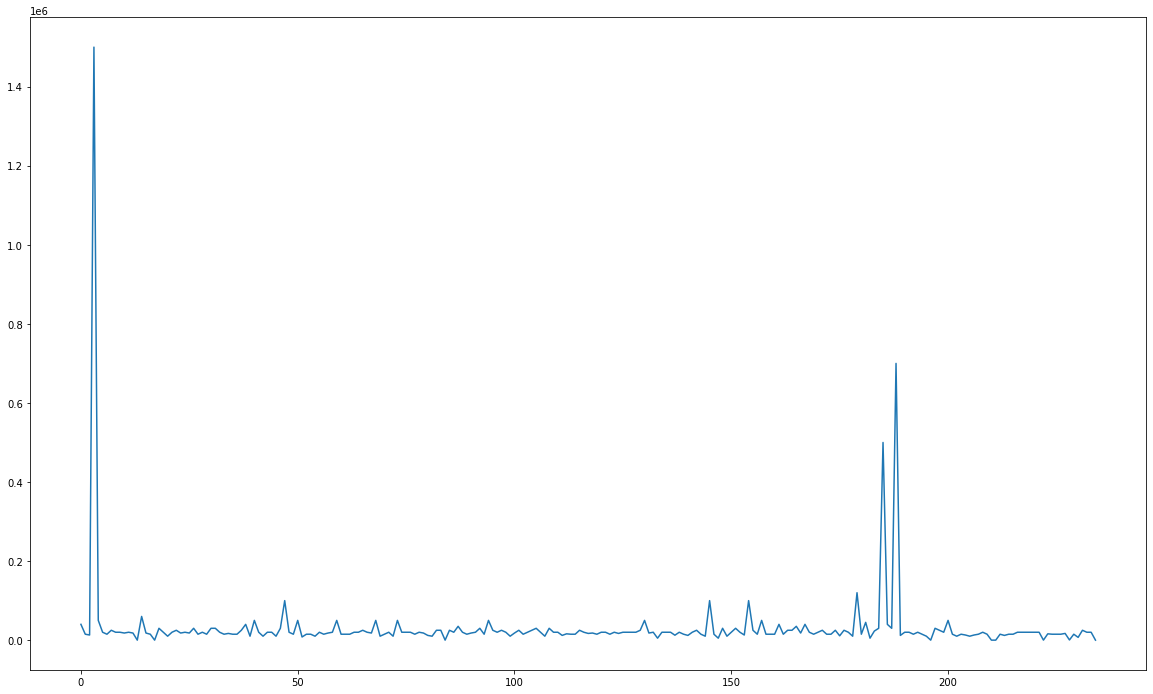

In [71]:
std_bhv['SalaryExpectation'].plot(figsize=(20, 12))

да предположения оправдались, сразу видно что есть выбросы. будем считать выбросами значения выше порога в 2e5 

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

строим распределение целевой переменной

<AxesSubplot:xlabel='LikeDegree', ylabel='Count'>

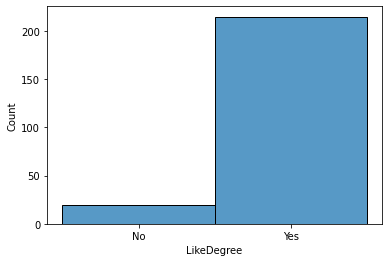

In [74]:
sns.histplot(std_bhv['LikeDegree'])

сильный дисбаланс классов, точно не сможем использовать accuracy, так как притаком дисбалансе будем получать высокий результат если модель просто будет всегда предсказывать значение yes. более реальный взгляд на вещи мы получим если будем использовать precision recall f1 prc

**Задание 8.**  Переведите целевую переменную к численному формату.

In [76]:
std_bhv = pd.get_dummies(std_bhv)

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [122]:
from sklearn.model_selection import train_test_split
X = std_bhv.drop(columns=['LikeDegree_Yes', 'LikeDegree_No'])
y = std_bhv['LikeDegree_No']

X_train, X_test, y_train, y_test = train_test_split(X,\
                    y, test_size=.5,random_state=10, shuffle=False)

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [123]:
X_train.shape[0]

116

In [132]:
def func():
    return np.ones(116)

модель будет возвращать просто масив едениц нужной длинны

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [133]:
from sklearn.neighbors import KNeighborsClassifier

построим модельки и повариируем параметры

In [134]:
n_3 = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=20).fit(X_train, y_train)

In [135]:
n_5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=20).fit(X_train, y_train)

In [136]:
n_7 = KNeighborsClassifier(n_neighbors=7, weights='uniform', leaf_size=30).fit(X_train, y_train)

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

воспользуемся classification_report так как он сразу выводит и recall и precision и f1_SCORE

In [137]:
from sklearn.metrics import classification_report


In [138]:
# уберем предупреждения
from warnings import filterwarnings
filterwarnings('ignore')

In [139]:
print(classification_report(y_test, func()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.07      1.00      0.13         8

    accuracy                           0.07       116
   macro avg       0.03      0.50      0.06       116
weighted avg       0.00      0.07      0.01       116



ожидаемо получили ужасный результат

In [140]:
print(classification_report(y_test, n_3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.00      0.00      0.00         8

    accuracy                           0.92       116
   macro avg       0.47      0.50      0.48       116
weighted avg       0.87      0.92      0.89       116



очевидно лучше

In [141]:
print(classification_report(y_test, n_5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       0.00      0.00      0.00         8

    accuracy                           0.93       116
   macro avg       0.47      0.50      0.48       116
weighted avg       0.87      0.93      0.90       116



In [142]:
print(classification_report(y_test, n_7.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       0.00      0.00      0.00         8

    accuracy                           0.93       116
   macro avg       0.47      0.50      0.48       116
weighted avg       0.87      0.93      0.90       116



модели сработали лучше наивного алгоритма но сами предсказывают доминирующий класс в большенстве случаев

**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [143]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler().fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

теперь обучим, как и в прошлый раз 3 модельки

In [144]:
n_3 = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=20).fit(X_train, y_train)

n_5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=20).fit(X_train, y_train)

n_7 = KNeighborsClassifier(n_neighbors=7, weights='uniform', leaf_size=30).fit(X_train, y_train)

In [145]:
print(classification_report(y_test, n_3.predict(X_test)))
print(classification_report(y_test, n_5.predict(X_test)))
print(classification_report(y_test, n_7.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.00      0.00      0.00         8

    accuracy                           0.91       116
   macro avg       0.46      0.49      0.48       116
weighted avg       0.87      0.91      0.88       116

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.00      0.00      0.00         8

    accuracy                           0.92       116
   macro avg       0.47      0.50      0.48       116
weighted avg       0.87      0.92      0.89       116

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       0.00      0.00      0.00         8

    accuracy                           0.93       116
   macro avg       0.47      0.50      0.48       116
weighted avg       0.87      0.93      0.90       116



получили те же результаты, не сильно помогло шкалирование

**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

Уберем выбросы

In [146]:
std_bhv = std_bhv.loc[std_bhv['SalaryExpectation'] <= 20e4]
X = std_bhv.drop(columns=['LikeDegree_Yes', 'LikeDegree_No'])
y = std_bhv['LikeDegree_No']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,\
                    y, test_size=.25,random_state=10, shuffle=False)

In [148]:
n_3 = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=20).fit(X_train, y_train)

n_5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=20).fit(X_train, y_train)

n_7 = KNeighborsClassifier(n_neighbors=7, weights='uniform', leaf_size=30).fit(X_train, y_train)

print(classification_report(y_test, n_3.predict(X_test)))
print(classification_report(y_test, n_5.predict(X_test)))
print(classification_report(y_test, n_7.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.00      0.00      0.00         2

    accuracy                           0.97        58
   macro avg       0.48      0.50      0.49        58
weighted avg       0.93      0.97      0.95        58

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.00      0.00      0.00         2

    accuracy                           0.97        58
   macro avg       0.48      0.50      0.49        58
weighted avg       0.93      0.97      0.95        58

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.00      0.00      0.00         2

    accuracy                           0.97        58
   macro avg       0.48      0.50      0.49        58
weighted avg       0.93      0.97      0.95        58



In [113]:
результат получился немного лучше

**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

понятно что наивная модель не несет пользы, хоть и могла бы показать хороший результат в случае если бы предсказывала всегда доминирующий класс а не наоборот.

knn модели работают плохо так как из за дисбаланса классов они предсказывают в основном только доминирующий класс, по этому метрики и выглядят красиво. Не очень есть смысл сравнивать их между собой но все же лучше сработали модельки после чего убрали из них выбросы